In [2]:
import diplib as dip
import numpy as np
import os
import matplotlib.pyplot as plt

img_folder = 'images'

DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


In [2]:
# Image loading
img = dip.ImageReadTIFF(f'{img_folder}/CamIm01.tif')

# Thresholding
bin_img = 255 - dip.OtsuThreshold(img)
bin_img2 = dip.Closing(bin_img, dip.SE([20, 20]))

# Segmentation
edge_img = dip.Abs(dip.SobelGradient(bin_img2, dimension=1))

# Artifact Exclusion
mask = dip.Threshold(edge_img)[0]
mask = dip.Dilation(mask, 5)
mask = dip.AreaOpening(mask, filterSize=2000)
mask = dip.Dilation(mask, 5)

# Measurements
labeled_mask = dip.Label(mask)
msr = dip.MeasurementTool.Measure(labeled_mask, edge_img, ['Gravity','GreyMajorAxes'])
coords = np.array([msr[i+1]['Gravity'] for i in range(msr.NumberOfObjects())])
msr

<Measurement with 3 features for 27 objects>

[2584, 1936]

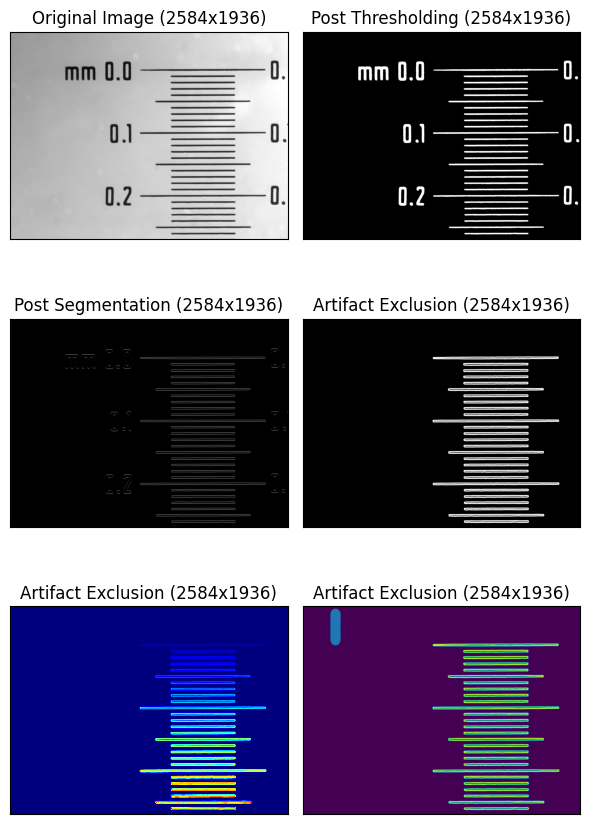

In [3]:
fig, axs = plt.subplots(3, 2, figsize=(6, 9))
axs = axs.flatten()
axs[0].imshow(img, cmap='gray')
axs[0].set_title(f'Original Image ({img.Sizes()[0]}x{img.Sizes()[1]})')
axs[1].imshow(bin_img, cmap='gray')
axs[1].set_title(f'Post Thresholding ({bin_img.Sizes()[0]}x{bin_img.Sizes()[1]})')
axs[2].imshow(edge_img, cmap='gray')
axs[2].set_title(f'Post Segmentation ({edge_img.Sizes()[0]}x{edge_img.Sizes()[1]})')
axs[3].imshow(mask, cmap='gray')
axs[3].set_title(f'Artifact Exclusion ({mask.Sizes()[0]}x{mask.Sizes()[1]})')

axs[4].imshow(labeled_mask, cmap='jet')
axs[4].set_title(f'Artifact Exclusion ({labeled_mask.Sizes()[0]}x{labeled_mask.Sizes()[1]})')

axs[5].imshow(mask)
axs[5].set_title(f'Artifact Exclusion ({mask.Sizes()[0]}x{mask.Sizes()[1]})')
axs[5].scatter(coords[:, 0], coords[:, 1])

for i in range(6):
    axs[i].axes.get_xaxis().set_visible(False)
    axs[i].axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

In [4]:
coords

array([[303.276     ,  61.24188249],
       [303.36066667,  71.2294437 ],
       [303.36066667,  81.13728428],
       [303.36066667,  91.02431215],
       [303.44533333, 100.97187828],
       [303.44533333, 110.88658135],
       [303.61466667, 120.81110776],
       [303.61466667, 130.72377331],
       [303.784     , 140.62310776],
       [303.61466667, 150.54003697],
       [303.44533333, 160.45868777],
       [303.784     , 170.38918481],
       [303.784     , 180.28681742],
       [303.82636876, 190.20681953],
       [303.784     , 200.12859966],
       [303.69933333, 210.03649735],
       [303.95333333, 219.95676717],
       [303.86866667, 229.87113647],
       [303.86866667, 239.77628412],
       [303.784     , 249.69210308],
       [303.69933333, 259.58669744],
       [304.16496452, 269.51280693],
       [304.20733333, 279.50768009],
       [304.20733333, 289.34620246],
       [304.20733333, 299.25419128],
       [304.24969065, 309.21840076],
       [304.24970215, 319.15231294]])

In [5]:
y_coords = np.array([msr[i+1]['Gravity'][1] for i in range(msr.NumberOfObjects())])
distances = (y_coords - np.roll(y_coords, 1))[1:]
print(f"Distances: {distances.mean():.2f} ± {distances.std():.2f}")

Distances: 9.92 ± 0.03


## 3.2

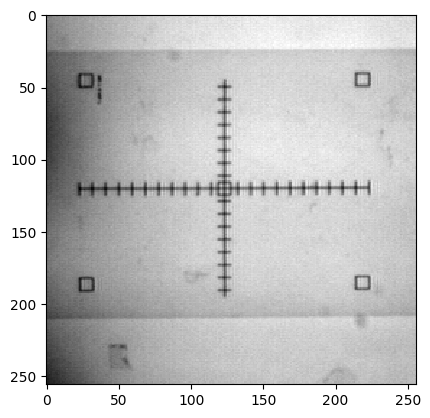

In [4]:
img_tif = dip.ImageReadTIFF(f'{img_folder}/scale-img.tif')
img_tif.Show()

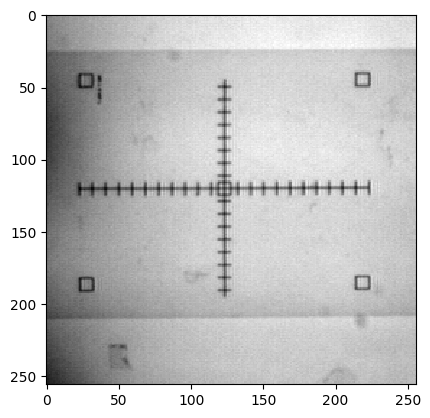

In [6]:
img_ics = dip.ImageReadICS(f'{img_folder}/scale-img.ics')
img_ics.Show()

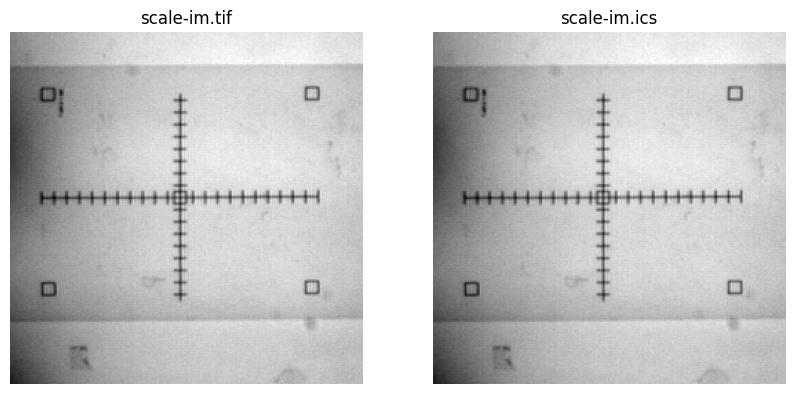

.tif dimensions:  (256, 256) 
.ics dimensions:  (256, 256)
mean difference: 0.00
St. dev of difference: 0.00
file size of scale-im.tif: 64.23 KB
file size of scale-im.ics: 0.28 KB


In [31]:
import diplib as dip
import numpy as np
import os
import matplotlib.pyplot as plt

img_folder = 'images'

img_tif = dip.ImageReadTIFF(f'{img_folder}/scale-img.tif')
img_ics = dip.ImageReadICS(f'{img_folder}/scale-img.ics')

img_tif_data = np.asarray(img_tif)
img_ics_data = np.asarray(img_ics)

#images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_tif_data, cmap='gray')
plt.title('scale-im.tif')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_ics_data, cmap='gray')
plt.title('scale-im.ics')
plt.axis('off')

plt.show()

print(".tif dimensions: ", img_tif_data.shape, "\n.ics dimensions: ", img_ics_data.shape)


# diff calculation
difference = np.abs(img_tif_data - img_ics_data)
mean_difference = np.mean(difference)
std_difference = np.std(difference)
print(f"mean difference: {mean_difference:.2f}")
print(f"St. dev of difference: {std_difference:.2f}")

file_size_tif = os.path.getsize(f'{img_folder}/scale-img.tif')
file_size_ics = os.path.getsize(f'{img_folder}/scale-img.ics')

print(f"file size of scale-im.tif: {file_size_tif / 1024:.2f} KB")
print(f"file size of scale-im.ics: {file_size_ics / 1024:.2f} KB")



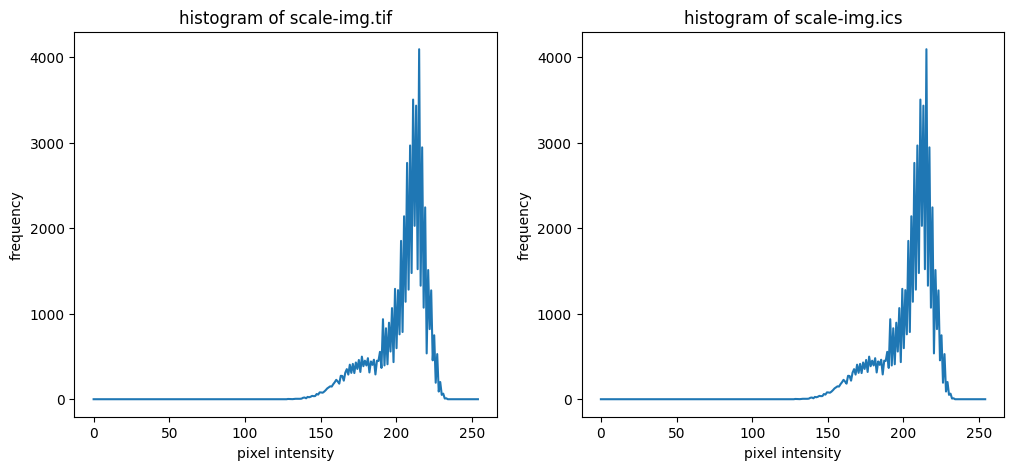

histogram correlation: 1.00


In [30]:
#compare hisograms
hist_tif = np.histogram(img_tif_data, bins=256, range=(0, 255))
hist_ics = np.histogram(img_ics_data, bins=256, range=(0, 255))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_tif[1][:-1], hist_tif[0], label='TIFF')
plt.title('histogram of scale-img.tif')
plt.xlabel('pixel intensity')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.plot(hist_ics[1][:-1], hist_ics[0], label='ICS')
plt.title('histogram of scale-img.ics')
plt.xlabel('pixel intensity')
plt.ylabel('frequency')


plt.show()

# histogram diff
hist_diff = np.corrcoef(hist_tif[0], hist_ics[0])[0, 1]
print(f"histogram correlation: {hist_diff:.2f}")


## 3.3

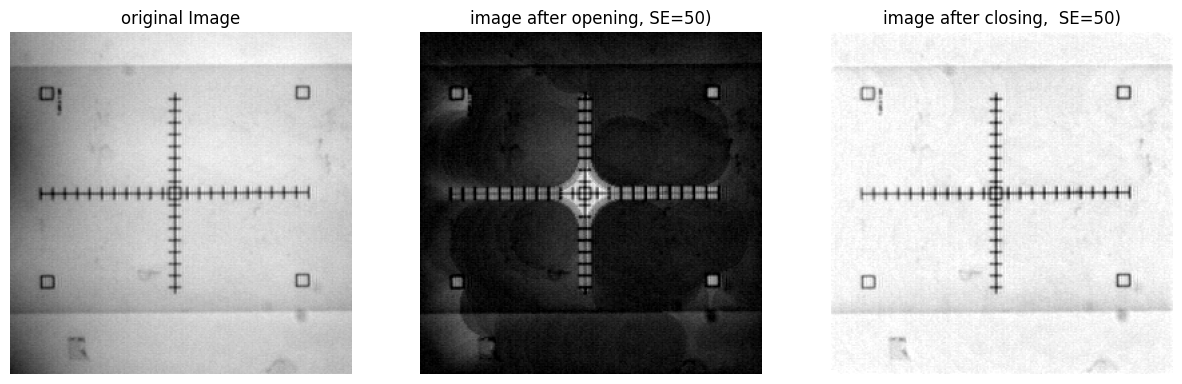

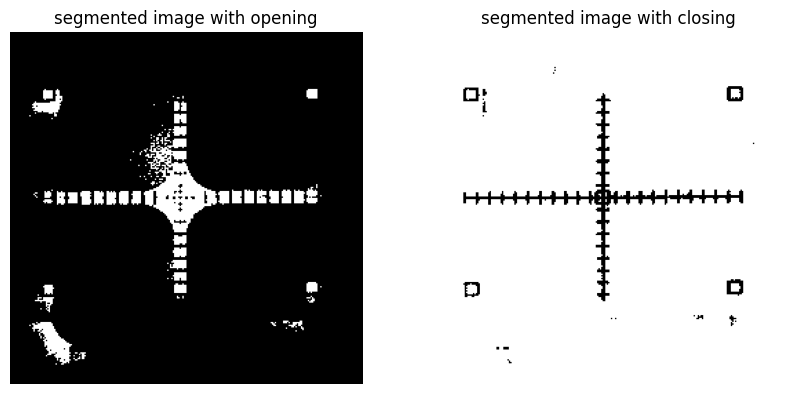

pixel size from method 1: 0.004998 mm per pixel
pixel size from method 2: 0.000562 mm per pixel


In [40]:
img = dip.ImageReadTIFF(f'{img_folder}/scale-img.tif')

# method 1: background subtraction with morphological opening
se_size1 = 50
se1 = dip.SE((se_size1, se_size1))
background1 = dip.Opening(img, se1)
enhanced_img1 = img - background1

# method 2:background subtraction with morphological closing
se_size2 = 50
se2 = dip.SE((se_size2, se_size2))
background2 = dip.Closing(img, se2)
enhanced_img2 = img - background2

# results of methods
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(np.asarray(img), cmap='gray')
axs[0].set_title('original Image')
axs[1].imshow(np.asarray(enhanced_img1), cmap='gray')
axs[1].set_title(f'image after opening, SE={se_size1})')
axs[2].imshow(np.asarray(enhanced_img2), cmap='gray')
axs[2].set_title(f'image after closing,  SE={se_size2})')
for ax in axs:
    ax.axis('off')
plt.show()

# threshold segmentation
bin_img1 = dip.OtsuThreshold(enhanced_img1)
bin_img2 = dip.OtsuThreshold(enhanced_img2)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asarray(bin_img1), cmap='gray')
axs[0].set_title('segmented image with opening')
axs[1].imshow(np.asarray(bin_img2), cmap='gray')
axs[1].set_title('segmented image with closing')
for ax in axs:
    ax.axis('off')
plt.show()

labeled_mask1 = dip.Label(bin_img1)
labeled_mask2 = dip.Label(bin_img2)

# measurements for method1
msr1 = dip.MeasurementTool.Measure(labeled_mask1, enhanced_img1, ['Gravity', 'GreyMajorAxes'])
coords1 = np.array([msr1[i+1]['Gravity'] for i in range(msr1.NumberOfObjects())])
y_coords1 = np.array([coord[1] for coord in coords1])
distances1 = np.diff(np.sort(y_coords1))
pixel_size1 = 0.01 / distances1.mean()
print(f"pixel size from method 1: {pixel_size1:.6f} mm per pixel")

# measurements for method2
msr2 = dip.MeasurementTool.Measure(labeled_mask2, enhanced_img2, ['Gravity', 'GreyMajorAxes'])
coords2 = np.array([msr2[i+1]['Gravity'] for i in range(msr2.NumberOfObjects())])
y_coords2 = np.array([coord[1] for coord in coords2])
distances2 = np.diff(np.sort(y_coords2))
pixel_size2 = 0.01 / distances2.mean()
print(f"pixel size from method 2: {pixel_size2:.6f} mm per pixel")